In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# 1. Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## 1.1. Text Preprocessing

In [7]:
import re
import string

##### Convert Uppercase Letters to Lowercase

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


##### Remove Web Links

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags = re.MULTILINE) for x in x.split()))

In [11]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


##### Remove Punctuation Marks

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Remove Numbers

In [15]:
data["tweet"] = data["tweet"].str.replace(r'\d+','', regex = True)

In [16]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Remove StopWords

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
    
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [21]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping lovely year old neighbor ipad morning ...
7918,7919,0,finally got smart pocket wifi stay connected a...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Stemming >> ( create = creating/created/creation )

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer ()

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem (x) for x in x.split()))

In [24]:
data.tail(3)

,id,label,tweet
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...
7919,7920,0,appl barcelona appl store bcn barcelona travel...


## 1.2. Building a Vocabulary

In [25]:
from collections import Counter
vocab = Counter()

In [26]:
vocab

Counter()

In [27]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [28]:
len(vocab) # Features

15949

In [29]:
data.shape # Data-Rows

(7920, 3)

FEATURE count in vocabulary (vocab) is higher than DATA_ROW count. So can be OVERFITTING.

In [30]:
token = [key for key in vocab if vocab[key] > 15]

In [31]:
len(token) # New-Features|

831

Now FEATURE count in vocabulary (token) is lower than DATA_ROW count.


In [32]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(token, '../static/model/vocabulary.txt')

## 1.3. Divide Dataset

In [33]:
x = data['tweet']
y = data['label']

In [34]:
!pip install scikit-learn

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2)

In [37]:
x_train.shape

(6336,)

In [38]:
x_test.shape

(1584,)

In [39]:
x_train

3227    appl juic lol fun movi friend theincred pixar ...
7431               got facetim mom jetson familia w iphon
3758    rome cittàitali iphon instafood infoodwetrust ...
4155    love thing cost penni newphon amazon wrapsbysa...
1596    sonypictur go fuck yourselfyour go pull movi t...
                              ...                        
1745    go beach alreadi emailsalescyberexpressbiz sta...
683     forget troubl share face emoji ibbleobbl imess...
257     dear appl thank sell dollar laptop date year a...
124     unpack soni xperia z compact android realli re...
939     summer back summer tshirt iphon gay blue hot s...
Name: tweet, Length: 6336, dtype: object

In [40]:
x_test

4338    get new tv today samsung inch smarttv led hd p hz
120     photo vegan glutenfre appl pie day silli sally...
2399    final open organiqa case find uniqu case iphon...
5960    tonight cirebon citi cirebon photographi canon...
3933    samsung take rt carawin omg phone newphon sams...
                              ...                        
5801     phone soni use art pictur music iger idaili inst
2284    cover peeper ksa kuw kuwait q qatar us uae usa...
3922    new born babi babi instadaili faci frankshinod...
1304    what iphon iphon appl vlog vlogger l canon nik...
490      anyon updat io know pain past hour killingmyself
Name: tweet, Length: 1584, dtype: object

## 1.4. Vectorization

Texts are converting into Numerical Numbers

In [41]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
    
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
    
        vectorized_lst.append(sentence_lst)
    
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [42]:
vectorized_x_train = vectorizer(x_train, token)

In [43]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 831), dtype=float32)

In [44]:
vectorized_x_test = vectorizer(x_test, token)

In [45]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 831), dtype=float32)

In [46]:
y_train

3227    0
7431    0
3758    0
4155    0
1596    1
       ..
1745    0
683     0
257     1
124     0
939     0
Name: label, Length: 6336, dtype: int64

In [47]:
y_test

4338    0
120     0
2399    0
5960    0
3933    0
       ..
5801    0
2284    0
3922    0
1304    0
490     1
Name: label, Length: 1584, dtype: int64

In [48]:
y_train.value_counts()

label
0    4732
1    1604
Name: count, dtype: int64

The data set is imbalanced 4716 : 1628

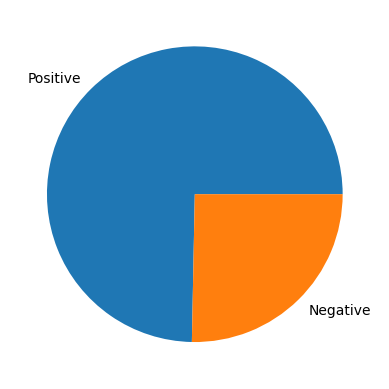

In [49]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative' ])
plt.show()

## 1.5. Handling Imbalanced dataset 4716 : 1628

In [50]:
!pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9464, 831) (9464,)


In [52]:
y_train_smote.value_counts()

label
0    4732
1    4732
Name: count, dtype: int64

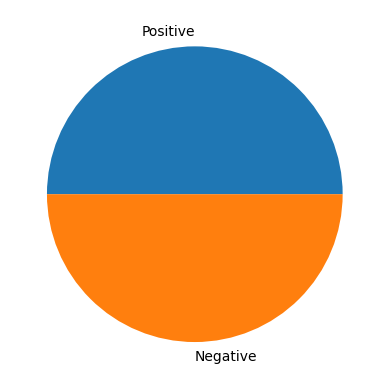

In [53]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative' ])
plt.show()

In [54]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9464, 831), dtype=float32)

In [55]:
y_train_smote

0       0
1       0
2       0
3       0
4       1
       ..
9459    1
9460    1
9461    1
9462    1
9463    1
Name: label, Length: 9464, dtype: int64

In [56]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 831), dtype=float32)

In [57]:
y_test

4338    0
120     0
2399    0
5960    0
3933    0
       ..
5801    0
2284    0
3922    0
1304    0
490     1
Name: label, Length: 1584, dtype: int64

# 2. Model Training & Evaluation

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Creating a function to Evaluate the model and to check performance

In [59]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## 2.1. Logistic Regression Model

In [60]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

##### Checking TRAINED dataset's accuracy

In [61]:
y_train_predicted = lr.predict(vectorized_x_train_smote)
y_test_predicted = lr.predict(vectorized_x_test)

In [62]:
training_scores(y_train_smote, y_train_predicted)

Training Scores:
	Accuracy = 0.93
	Precision = 0.905
	Recall = 0.96
	F1-Score = 0.932


##### Checking TEST dataset's accuracy

In [63]:
testing_scores(y_test, y_test_predicted)

Testing Scores:
	Accuracy = 0.857
	Precision = 0.688
	Recall = 0.851
	F1-Score = 0.761


## 2.2. Multinomial Naive Bayes Model

In [64]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

MultinomialNB()

In [65]:
y_train_predicted = mnb.predict(vectorized_x_train_smote)
y_test_predicted = mnb.predict(vectorized_x_test)

In [66]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.903
	Precision = 0.868
	Recall = 0.951
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.852
	Precision = 0.66
	Recall = 0.917
	F1-Score = 0.768


## 2.3. Decicion Tree Model

In [523]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [524]:
y_train_predicted = dt.predict(vectorized_x_train_smote)
y_test_predicted = dt.predict(vectorized_x_test)

In [525]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.817
	Precision = 0.677
	Recall = 0.604
	F1-Score = 0.638


## 2.4. Random Forest Model

In [526]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

RandomForestClassifier()

In [527]:
y_train_predicted = rf.predict(vectorized_x_train_smote)
y_test_predicted = rf.predict(vectorized_x_test)

In [528]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.853
	Precision = 0.748
	Recall = 0.679
	F1-Score = 0.712


## 2.5. Support Vector Classifier Model - SVC

In [529]:
svc = SVC()
svc.fit(vectorized_x_train_smote, y_train_smote)

SVC()

In [530]:
y_train_predicted = svc.predict(vectorized_x_train_smote)
y_test_predicted = svc.predict(vectorized_x_test)

In [531]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.973
	Precision = 0.953
	Recall = 0.995
	F1-Score = 0.974
Testing Scores:
	Accuracy = 0.872
	Precision = 0.727
	Recall = 0.835
	F1-Score = 0.777


# 3. Save & Load the Model

In [533]:
import pickle
with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)